In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Finding Outliers in the input dataset


### Battery level and estimated vehcile range
Source: vmarrapu@gmail.com (handwritten based on datasets from Bolt vehicle datasets


In [2]:

batt_range_df = pd.read_csv('datasets/volt_bat_dist_poc_out_sec_o.csv')
batt_range_df.head(10)

,sensor_id,data_timstm,BATT_LEVEL,RANGE_EST
0,E3ULINANMZ3PMJ86M,4/8/2021 5:11,73.3,257
1,E3ULINANMZ3PMJ86M,4/8/2021 7:01,73.7,257
2,O4DMB4TYYPZJLACPG,4/8/2021 2:31,45.0,129
3,WB08O7DYACSLZOJ3C,4/6/2021 9:06,64.7,199
4,L1N2SDI4DQPZEFTCV,4/8/2021 5:42,78.4,197
5,L1N2SDI4DQPZEFTCV,4/8/2021 6:01,81.1,204
6,L1N2SDI4DQPZEFTCV,4/8/2021 6:09,82.3,209
7,L1N2SDI4DQPZEFTCV,4/8/2021 6:15,83.1,209
8,L1N2SDI4DQPZEFTCV,4/8/2021 7:01,91.7,228
9,ALBNEXNVYW5M6TNPS,4/7/2021 9:30,92.5,307


In [3]:
batt_range_df.shape

(107, 4)

In [4]:
batt_range_df.columns

Index(['sensor_id', 'data_timstm', 'BATT_LEVEL', 'RANGE_EST'], dtype='object')

In [5]:
X = batt_range_df[['BATT_LEVEL', 'RANGE_EST']]

X.sample(10)

,BATT_LEVEL,RANGE_EST
67,81.5,278
3,64.7,199
41,38.0,89
4,78.4,197
71,82.7,246
72,86.6,255
103,76.0,207
102,94.5,320
20,57.2,162
73,91.3,267


In [6]:
X.describe()

,BATT_LEVEL,RANGE_EST
count,107.000000,107.000000
mean,62.439252,199.121495
std,22.452759,103.149983
min,20.300000,77.000000
25%,38.400000,92.000000
50%,57.200000,162.000000
75%,82.900000,279.000000
max,100.000000,392.000000


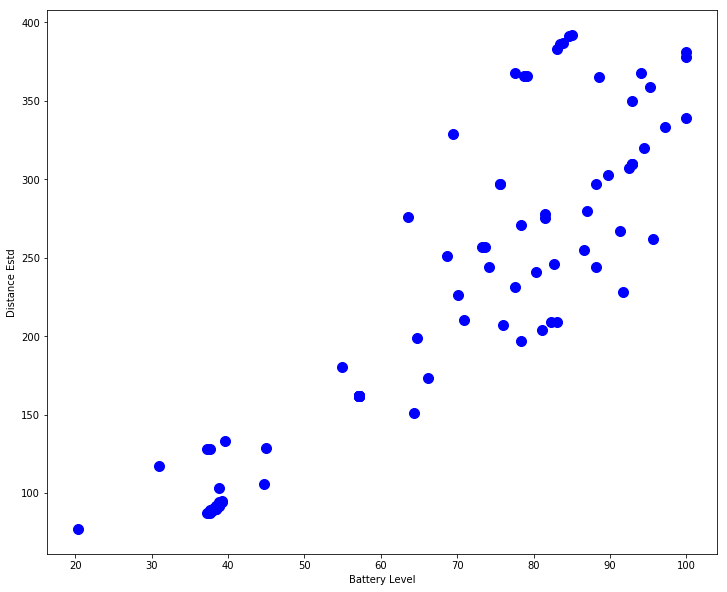

In [7]:
plt.figure(figsize=(12, 10))

plt.scatter(X['BATT_LEVEL'], X['RANGE_EST'], s=100, color='blue')

plt.ylabel("Distance Estd")
plt.xlabel("Battery Level")

plt.show()

### EllipticEnvelope
https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html

In [8]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(support_fraction=None, contamination=0.1)

In [9]:
y_pred = ee.fit_predict(X)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1])

In [10]:
n_outliers = (y_pred == -1).sum()
n_outliers

11

In [11]:
xx, yy = np.meshgrid(np.linspace(X['BATT_LEVEL'].min(), X['BATT_LEVEL'].max(), 500),
                     np.linspace(X['RANGE_EST'].min(), X['RANGE_EST'].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

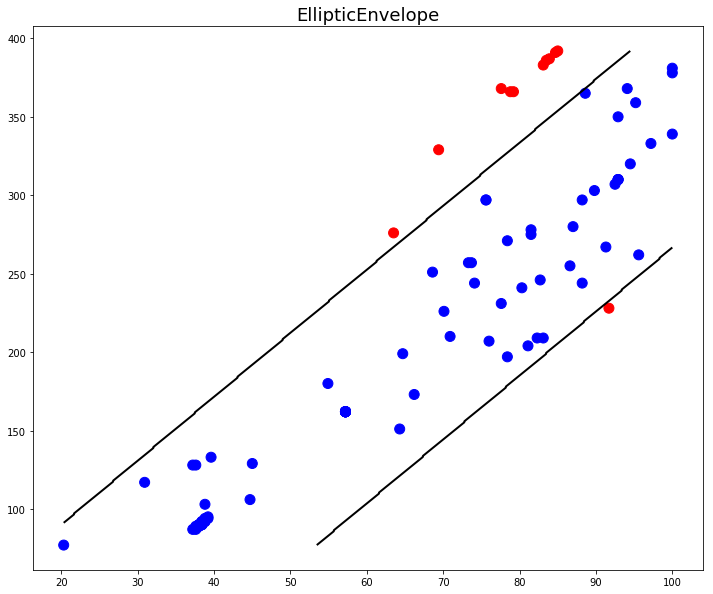

In [12]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(X['BATT_LEVEL'], 
            X['RANGE_EST'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

### IsolationForest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [13]:
from sklearn.ensemble import IsolationForest

isf =  IsolationForest(behaviour='new', contamination=0.08)

In [14]:
y_pred = isf.fit_predict(X)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1])

In [15]:
n_outliers = (y_pred == -1).sum()
n_outliers

9

In [16]:
xx, yy = np.meshgrid(np.linspace(X['BATT_LEVEL'].min(), X['BATT_LEVEL'].max(), 500),
                     np.linspace(X['RANGE_EST'].min(), X['RANGE_EST'].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

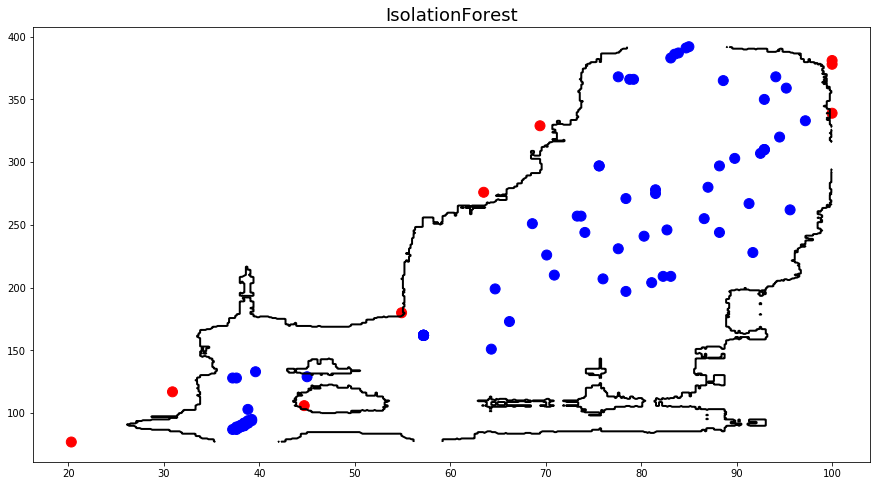

In [17]:
plt.figure(figsize=(15, 8))

plt.title('IsolationForest', size=18)

plt.scatter(X['BATT_LEVEL'], 
            X['RANGE_EST'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

### LocalOutlierFactor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [18]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')

In [19]:
y_pred = lof.fit_predict(X)

y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

In [20]:
n_outliers = (y_pred == -1).sum()
n_outliers

15

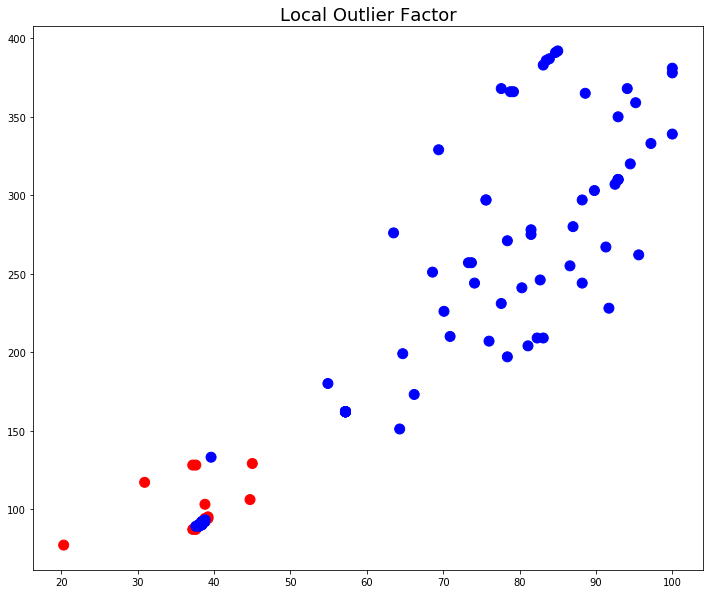

In [21]:
plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(X['BATT_LEVEL'], 
            X['RANGE_EST'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [22]:
X_scores = lof.negative_outlier_factor_
X_scores[0:10]

array([-0.98394553, -0.98440489, -1.81786349, -1.0438664 , -1.05229829,
       -1.08232786, -1.06555814, -1.06637966, -1.04476289, -1.03884041])

##### Circles with radius proportional to the outlier scores

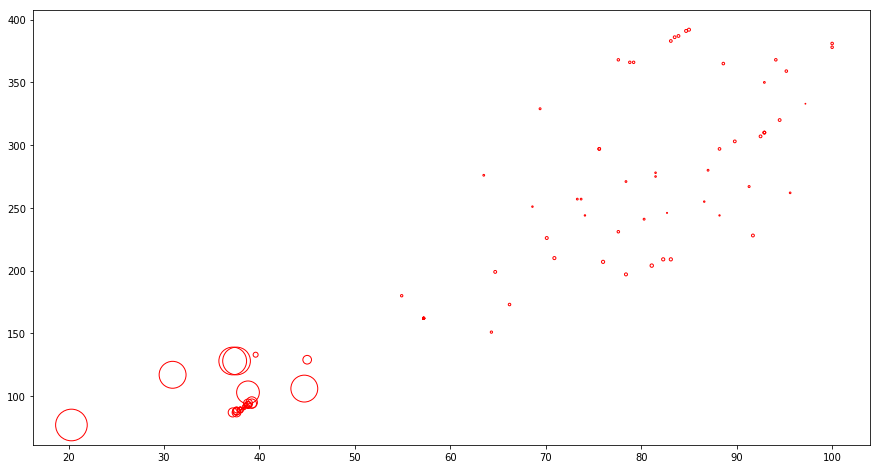

In [23]:
plt.figure(figsize=(15, 8))

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X['BATT_LEVEL'], 
            X['RANGE_EST'], 
            s=1000 * radius, edgecolors='r',
            facecolors='none', 
            label='Outlier scores')

plt.show()